## Модель цен на автомобили

Имеется набор данных с признаками автомобилей и ценами на них. Необходимо построить предсказание цены

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [245]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [246]:
data = pd.read_csv( 'cars.csv', delimiter = '\t' )
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,1.0
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,0.0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,1.0


In [247]:
data.shape

(804, 12)

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    float64
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    float64
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    float64
 9   Cruise    804 non-null    float64
 10  Sound     804 non-null    float64
 11  Leather   804 non-null    float64
dtypes: float64(8), object(4)
memory usage: 75.5+ KB


Самое простое предположение, чтобы было удобнее отобразить это посторить зависимости цены от пробега

In [249]:
X = data[ ['Mileage'] ]
Y = data['Price']

In [250]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [251]:
from sklearn.linear_model import LinearRegression

In [252]:
model = LinearRegression(normalize=True)

In [253]:
model.fit(X, Y)

LinearRegression(normalize=True)

In [254]:
y_predict = model.predict(X)

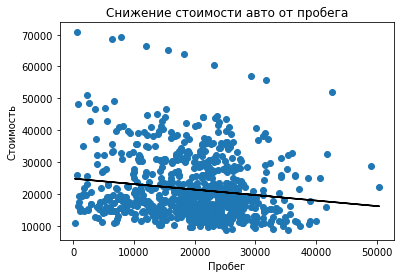

In [255]:
plt.plot(X, Y, 'o')
plt.plot(X, y_predict, 'k-')
plt.title("Снижение стоимости авто от пробега")
plt.xlabel("Пробег")
plt.ylabel("Стоимость")
plt.show()

### Задание слушателям

1. Выбрать самое дорогое авто и построить для него предсказание цены от пробега
2. Отобразить графически

In [256]:
data = data.sort_values('Price', ascending=False)
data.head(1)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
150,70755.466716,583.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0


In [257]:
data2 = data[ data.Model == 'XLR-V8' ]
data2

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
150,70755.466716,583.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
152,69133.731722,7892.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
151,68566.187189,6420.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
153,66374.307040,12021.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
154,65281.481237,15600.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
155,63913.117248,18200.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
156,60567.549093,23193.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
157,57154.443437,29260.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0
158,55639.087654,31805.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,0.0,1.0
159,52001.994379,42691.0,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8.0,4.6,2.0,1.0,1.0,1.0


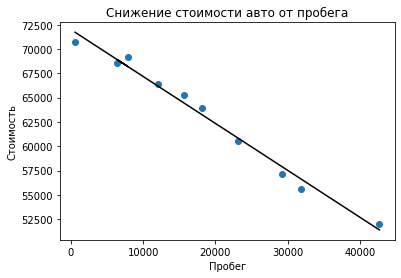

In [258]:
X = data2[ ['Mileage'] ]
Y = data2['Price']
model.fit(X, Y)
y_predict = model.predict(X)
plt.plot(X, Y, 'o')
plt.plot(X, y_predict, 'k-')
plt.title("Снижение стоимости авто от пробега")
plt.xlabel("Пробег")
plt.ylabel("Стоимость")
plt.show()

In [259]:
mean_squared_error(Y, y_predict)

507217.9367063431

In [260]:
mean_absolute_error(Y, y_predict)

650.4336100690394

In [261]:
model.coef_

array([-0.48268298])

#### Строим линейную регрессию по всему датафрейму

In [262]:
X = data.drop(['Price'], axis=1)


In [263]:
X = X.astype({'Make': 'category', 'Model': 'category', 'Trim': 'category', 'Type': 'category', 'Cylinder': 'category', 'Doors': 'category'})

In [264]:
make = pd.get_dummies(X['Make'])

In [265]:
X = pd.concat([X, make], axis=1)

In [266]:
Y = data['Price']

In [267]:
X = X.drop(['Make', 'Model', 'Trim','Type', 'Cylinder', 'Doors'], axis=1)


In [268]:
scaler.fit(X)
X = scaler.transform(X)

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [270]:
model=LinearRegression(normalize=False)

In [271]:
model.fit(X_train, y_train)

LinearRegression()

In [272]:
y_predict_2 = model.predict(X_test)

In [273]:
# Коэффициент детерминации
model.score(X_test, y_test)

0.8795908679226656

In [274]:
print('MSE = ',mean_squared_error(y_test, y_predict_2))
print('Ср.абс.ош. = ',mean_absolute_error(y_test, y_predict_2))

MSE =  12284971.286341194
Ср.абс.ош. =  2171.273546929338


## Нужно что-то получше!!!

### Задание

1. Улучшить модель

In [275]:
from sklearn.svm import LinearSVR

In [276]:
X_train

array([[-1.01058611,  0.69029267,  0.57352037, ...,  2.0880613 ,
        -0.40646942, -0.28398092],
       [ 0.3413491 ,  0.41876855,  0.57352037, ...,  2.0880613 ,
        -0.40646942, -0.28398092],
       [ 0.1935079 ,  0.41876855, -1.74361722, ..., -0.47891314,
        -0.40646942, -0.28398092],
       ...,
       [ 1.02671702,  0.69029267,  0.57352037, ..., -0.47891314,
        -0.40646942, -0.28398092],
       [ 0.19387414,  0.41876855,  0.57352037, ..., -0.47891314,
        -0.40646942, -0.28398092],
       [-1.6386976 , -0.66732794,  0.57352037, ..., -0.47891314,
         2.46020966, -0.28398092]])

In [281]:
model = LinearSVR(epsilon=0.1,C=100,max_iter=10000000).fit(X_train, y_train)

In [282]:
y_predict_2 = model.predict(X_test)

In [283]:
model.score(X_test, y_test)

0.8076117366946357

In [284]:
print('MSE = ',mean_squared_error(y_test, y_predict_2))
print('Ср.абс.ош. = ',mean_absolute_error(y_test, y_predict_2))

MSE =  19628779.393721323
Ср.абс.ош. =  2464.679189648113
